<a href="https://colab.research.google.com/github/e-pyrom/DS-Unit-4-Sprint-1-NLP/blob/master/module2-vector-representations/LS_DS_412_Vector_Representations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [0]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
from spacy.tokenizer import Tokenizer
from bs4 import BeautifulSoup
from sklearn.neighbors import NearestNeighbors

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [0]:
df = pd.read_csv('./data/job_listings.csv')
print(df.shape)
df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [0]:
nlp = spacy.load("en_core_web_lg")

#Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
def remove_html_unicode(df):

    df['description'] = df['description'].apply(lambda x: BeautifulSoup(x).get_text()[2:].replace('\\n', ' '))
    
    df['description'] = df['description'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', '')
    
    return df
df = remove_html_unicode(df)

In [0]:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

df['tokens']

0      [b, requirements:, conceptual, understanding, ...
1      [b, description,  , data, scientist, 1,, help,...
2      [ , data, scientist, working, consulting, busi...
3      [,969, $6,756, monthcontractunder, general, su...
4      [cation:, usa,  , multiple, locations, 2+, yea...
                             ...                        
421    [us:, want, fantastic, fun, startup, thats, re...
422    [ternshipat, uber,, ignite, opportunity, setti...
423    [00,000, $350,000, yeara, million, people, yea...
424    [nior, data, scientist, job, description,  ,  ...
425    [rner, intelligence, new,, innovative, organiz...
Name: tokens, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
vect = CountVectorizer(stop_words='english', min_df = 0.03, max_df= 0.90)

vect.fit(df['description'])

dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(),columns = vect.get_feature_names())
dtm.head()

,000,10,100,12,20,2019,25,3rd,40,401,...,worldwide,write,writing,written,www,year,years,york,youll,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
print(vect.get_feature_names())

['000', '10', '100', '12', '20', '2019', '25', '3rd', '40', '401', '401k', '500', '600', 'abilities', 'ability', 'able', 'academic', 'accelerate', 'accept', 'access', 'accessible', 'accommodation', 'accommodations', 'accordance', 'according', 'accredited', 'accuracy', 'accurate', 'achieve', 'acquisition', 'act', 'action', 'actionable', 'actions', 'active', 'actively', 'activities', 'acumen', 'ad', 'add', 'addition', 'additional', 'address', 'adoption', 'advance', 'advanced', 'advantage', 'advertising', 'affiliation', 'affirmative', 'age', 'agencies', 'agency', 'agile', 'ai', 'algorithm', 'algorithmic', 'algorithms', 'allow', 'allows', 'alongside', 'amazon', 'amounts', 'analyses', 'analysis', 'analyst', 'analysts', 'analytic', 'analytical', 'analytics', 'analyze', 'analyzes', 'analyzing', 'ancestry', 'anomaly', 'answer', 'apis', 'app', 'applicable', 'applicants', 'application', 'applications', 'applied', 'applies', 'apply', 'applying', 'approach', 'approaches', 'appropriate', 'apps', 'a

In [0]:
print(dtm)

     000  10  100  12  20  2019  25  3rd  40  401  ...  worldwide  write  \
0      0   0    0   0   0     0   0    0   0    0  ...          0      1   
1      0   0    0   0   0     0   0    0   0    0  ...          0      0   
2      0   0    0   0   0     0   0    0   0    0  ...          0      0   
3      0   0    0   0   0     0   0    0   0    0  ...          0      0   
4      0   0    0   0   0     0   0    0   0    0  ...          0      0   
..   ...  ..  ...  ..  ..   ...  ..  ...  ..  ...  ...        ...    ...   
421    0   0    0   0   0     0   0    0   2    0  ...          0      0   
422    0   0    0   0   0     1   0    0   0    0  ...          0      0   
423    2   0    0   0   0     0   0    0   0    0  ...          0      0   
424    0   0    0   0   0     0   0    0   0    0  ...          0      0   
425    1   0    0   0   0     0   1    0   0    0  ...          0      0   

     writing  written  www  year  years  york  youll  youre  
0          0        0    

## 4) Visualize the most common word counts

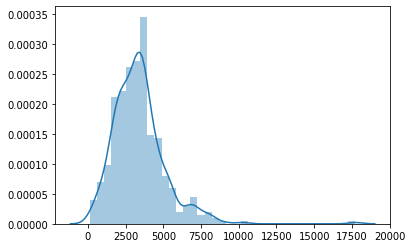

In [0]:
doc_len = [len(doc) for doc in df['description']]
sns.distplot(doc_len)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]

vect = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.95, ngram_range=(1,2))

sparse = vect.fit_transform(df['description'])

dtm = pd.DataFrame(sparse.todense(), columns=vect.get_feature_names())


dtm.head()

,,,,,experience,3,additional,bachelor,benefit,build,...,year,year experience,year hand,year industry,year professional,year relevant,year work,york,york city,you\'ll
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.087714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.082163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.077217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.075278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [0]:
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [0]:
ideal = ['''
Data scientist position focused on performing deep dive analysis into data sets and reports to identify problems or suspected issues with collected data.''']

new = vect.transform(ideal)

nn.kneighbors(new.todense())

(array([[1.27615539, 1.27675027, 1.28957226, 1.30396031, 1.30396031]]),
 array([[384, 136, 338, 373, 118]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 